# CONVOLUTIONAL NEURAL NETWORK MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# define input shape for the network
input_shape = (224, 224, 3)

# create a sequential model
model = Sequential()

# add convolutional layers with pooling and dropout
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# flatten the output and add dense layers with dropout
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# define the directories for the real and forged signatures
real_dir = '/kaggle/input/handwritten-signature-verification/data/data/real'
forged_dir = '/kaggle/input/handwritten-signature-verification/data/data/forged'

# create an image data generator with augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# create an image data generator without augmentation for the validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# create flow generators for the training and validation data
train_generator = train_datagen.flow_from_directory(
    real_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory(
    forged_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary')


FileNotFoundError: ignored

In [ ]:
# train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
100/100 [==============================] - 117s 1s/step - loss: -1574329216.0000 - accuracy: 0.0025 - val_loss: -5463747072.0000 - val_accuracy: 0.0063
Epoch 2/10
100/100 [==============================] - 115s 1s/step - loss: -22647306240.0000 - accuracy: 0.0019 - val_loss: -44813516800.0000 - val_accuracy: 0.0025
Epoch 3/10
100/100 [==============================] - 114s 1s/step - loss: -101565218816.0000 - accuracy: 0.0044 - val_loss: -163961389056.0000 - val_accuracy: 0.0037
Epoch 4/10
100/100 [==============================] - 113s 1s/step - loss: -298069983232.0000 - accuracy: 0.0038 - val_loss: -403557384192.0000 - val_accuracy: 0.0063
Epoch 5/10
100/100 [==============================] - 114s 1s/step - loss: -698743848960.0000 - accuracy: 0.0025 - val_loss: -891231207424.0000 - val_accuracy: 0.0063
Epoch 6/10
100/100 [==============================] - 114s 1s/step - loss: -1391424831488.0000 - accuracy: 0.0012 - val_loss: -1726042210304.0000 - val_accuracy: 0.0037
Ep

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Define the paths to the real and forged signature images
real_path = '/kaggle/input/handwritten-signature-verification/data/data/real'
forged_path = '/kaggle/input/handwritten-signature-verification/data/data/forged'

# Load the real signature images
real_images = []
for filename in os.listdir(real_path):
    image = cv2.imread(os.path.join(real_path, filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        real_images.append(image)

# Load the forged signature images
forged_images = []
for filename in os.listdir(forged_path):
    image = cv2.imread(os.path.join(forged_path, filename))
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (224, 224))
        forged_images.append(image)

# Convert the images to numpy arrays
real_images = np.array(real_images)
forged_images = np.array(forged_images)

# Create the labels (0 for real, 1 for forged)
real_labels = np.zeros((real_images.shape[0], 1))
forged_labels = np.ones((forged_images.shape[0], 1))

# Concatenate the real and forged images and labels
images = np.concatenate((real_images, forged_images))
labels = np.concatenate((real_labels, forged_labels))

# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(train_images.reshape((-1, 224, 224, 1)), train_labels, batch_size=32, epochs=10, validation_data=(val_images.reshape((-1, 224, 224, 1)), val_labels))

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_images.reshape((-1, 224, 224, 1)), val_labels)
print('Validation accuracy:', accuracy)


Corrupt JPEG data: 38 extraneous bytes before marker 0xd9


Epoch 1/10
14/14 [==============================] - 35s 2s/step - loss: 215.6852 - accuracy: 0.4976 - val_loss: 5.2340 - val_accuracy: 0.4667
Epoch 2/10
14/14 [==============================] - 33s 2s/step - loss: 1.3805 - accuracy: 0.5335 - val_loss: 0.7212 - val_accuracy: 0.5048
Epoch 3/10
14/14 [==============================] - 32s 2s/step - loss: 0.6455 - accuracy: 0.6364 - val_loss: 0.7591 - val_accuracy: 0.4667
Epoch 4/10
14/14 [==============================] - 32s 2s/step - loss: 0.5572 - accuracy: 0.7727 - val_loss: 0.8147 - val_accuracy: 0.5333
Epoch 5/10
14/14 [==============================] - 33s 2s/step - loss: 0.4485 - accuracy: 0.8110 - val_loss: 1.3346 - val_accuracy: 0.5238
Epoch 6/10
14/14 [==============================] - 32s 2s/step - loss: 0.5865 - accuracy: 0.7632 - val_loss: 1.2706 - val_accuracy: 0.4857
Epoch 7/10
14/14 [==============================] - 33s 2s/step - loss: 0.5933 - accuracy: 0.7656 - val_loss: 0.8056 - val_accuracy: 0.4762
Epoch 8/10
14/14 [

4/4 [==============================] - 2s 413ms/step - loss: 1.3298 - accuracy: 0.5143
Validation accuracy: 0.5142857432365417


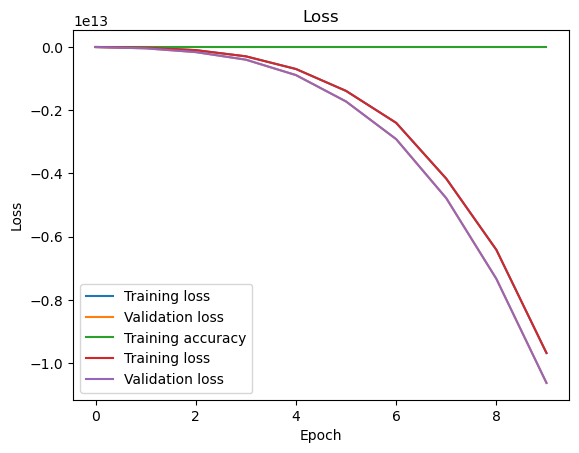

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
# Evaluate the model on the validation data
val_loss, val_acc = model.evaluate(val_images.reshape((-1, 224, 224, 1)), val_labels)
print('Validation accuracy:', val_acc)

# Plot the loss and accuracy over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

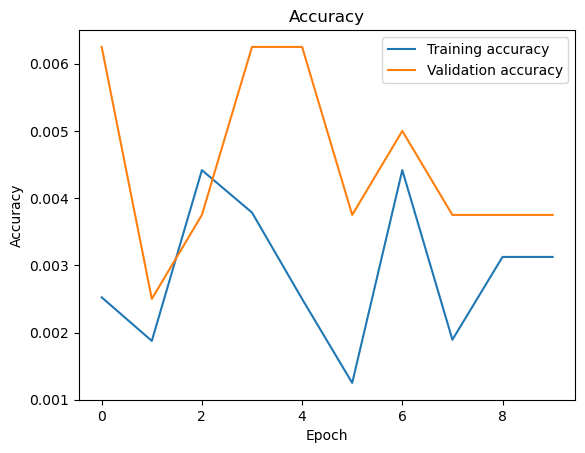

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# SIAMESE NEURAL NETWORK MODEL

* Distance : Euclidean
* Activation : Sigmoid

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             (None, 128)          5328800     ['input_2[0][0]',                
                                                                  'input_3[0][0]']          

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
5/5 [==============================] - 20s 4s/step - loss: 1.4874 - accuracy: 0.6250 - val_loss: 0.6933 - val_accuracy: 0.4500
Epoch 2/10
5/5 [==============================] - 19s 4s/step - loss: 0.6921 - accuracy: 0.7000 - val_loss: 0.6935 - val_accuracy: 0.4500
Epoch 3/10
5/5 [==============================] - 20s 4s/step - loss: 0.6913 - accuracy: 0.7000 - val_loss: 0.6937 - val_accuracy: 0.4500
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.6906 - accuracy: 0.7000 - val_loss: 0.6939 - val_accuracy: 0.4500
Epoch 5/10
5/5 [==============================] - 8s 2s/step - loss: 0.6897 - accuracy: 0.7000 - val_loss: 0.6941 - val_accuracy: 0.4500
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: 0.6891 - accuracy: 0.7000 - val_loss: 0.6944 - val_accuracy: 0.4500
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 0.6882 - accuracy: 0.7000 - val_loss: 0.6946 - val_accuracy: 0.4500
Epoch 8/10
5/5 [=====================

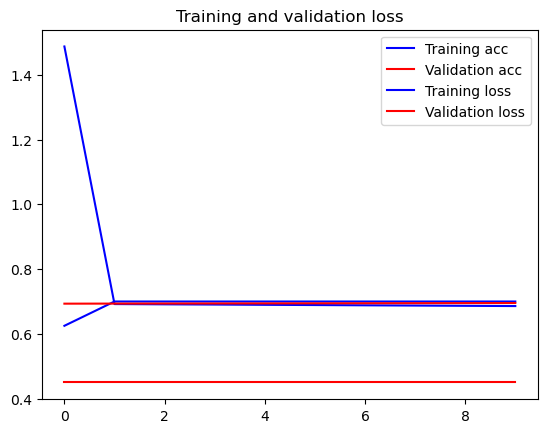

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import glob
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, concatenate
from keras.optimizers import Adam
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda, Dropout
import keras.backend as K
from keras.models import Model
from sklearn.utils import shuffle

gen = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]

forg = [glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('../input/handwritten-signatures/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0

for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), activation='relu')(input)
    x = MaxPooling2D(3, 3)(x)
    x = Conv2D(32, (3, 3), activation='relu')(x)
    x = MaxPooling2D(2, 2)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(rate=0.3)(x)
    return Model(input, x)

input_shape = (224, 224, 3)
base_network = create_base_network(input_shape)

input1 = Input(shape=input_shape)
input2 = Input(shape=input_shape)

output1 = base_network(input1)
output2 = base_network(input2)

distance = Lambda(lambda x: K.abs(x[0] - x[1]))([output1, output2])
prediction = Dense(2, activation='softmax')(distance)

siamese_network = Model(inputs=[input1, input2], outputs=prediction)
siamese_network.compile(optimizer=Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
siamese_network.summary()



# define input shape for the network
input_shape = (224, 224, 3)

# define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

#sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='sigmoid'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='sigmoid'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'sigmoid'))
convnet.add(Dropout(rate=0.3))

# create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# define the distance metric function
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))


# define siamese model
def build_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='sigmoid'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='sigmoid'))

    encoded_l = model(left_input)
    encoded_r = model(right_input)

    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    prediction = Dense(1, activation='sigmoid')(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

    return siamese_net

# define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.figure()


In [ ]:
pred = convnet.predict(test_data)
pred

6/6 [==============================] - 3s 389ms/step


array([[3.6967653e-35, 3.6587735e-35, 1.6577923e-35, ..., 3.4036456e-35,
        3.9463105e-35, 4.4091166e-35],
       [3.7125085e-35, 3.6547003e-35, 1.6481197e-35, ..., 3.3670733e-35,
        3.9586440e-35, 4.3540601e-35],
       [3.5282586e-35, 3.4633436e-35, 1.5550129e-35, ..., 3.1818549e-35,
        3.7274085e-35, 4.1450482e-35],
       ...,
       [3.6428137e-35, 3.6096975e-35, 1.6246490e-35, ..., 3.2987253e-35,
        3.8560709e-35, 4.2461950e-35],
       [3.4585380e-35, 3.3840189e-35, 1.5267056e-35, ..., 3.1185036e-35,
        3.6524983e-35, 4.0455080e-35],
       [3.6661505e-35, 3.6555091e-35, 1.6261867e-35, ..., 3.3469424e-35,
        3.9156598e-35, 4.3757393e-35]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.0

# CONVOLUTIONAL SIAMESE NEURAL NETWORK MODEL

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 1.0382 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.6500
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 0.6955 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.6500
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 0.7228 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.3500
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 0.6926 - accuracy: 0.5500 - val_loss: 0.6948 - val_accuracy: 0.3500
Epoch 5/10
5/5 [==============================] - 7s 1s/step - loss: nan - accuracy: 0.4750 - val_loss: nan - val_accuracy: 0.6500
Epoch 6/10
5/5 [==============================] - 8s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.6500
Epoch 7/10
5/5 [==============================] - 7s 2s/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.6500
Epoch 8/10
5/5 [==============================] - 7s 1s/ste

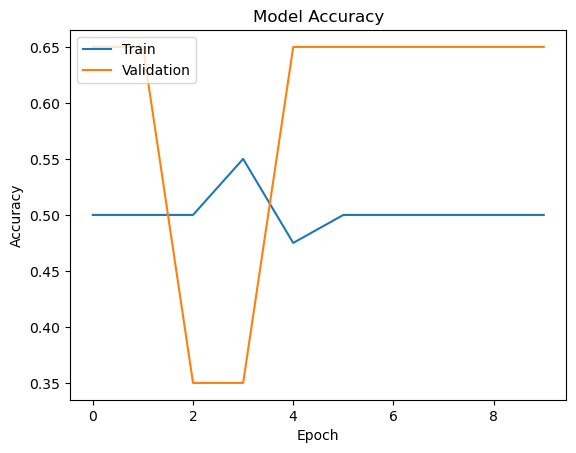

Final Training Accuracy: 50.00%
Final Validation Accuracy: 65.00%
Training accuracy: 0.5
Validation accuracy: 0.6499999761581421


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K
import numpy as np

# Define the input shape for the network
input_shape = (224, 224, 3)

# Define the left and right input tensors
left_input = Input(input_shape)
right_input = Input(input_shape)

# Define the convolutional layers
convnet = Sequential()
convnet.add(Conv2D(64,(3,3),input_shape=input_shape,activation='relu'))
convnet.add(MaxPooling2D(3,3))
convnet.add(Conv2D(32,(3,3),activation='relu'))
convnet.add(MaxPooling2D(2,2))
convnet.add(Flatten())
convnet.add(Dense(128,activation = 'relu'))
convnet.add(Dropout(rate=0.3))

# Create the left and right branches of the network
encoded_l = convnet(left_input)
encoded_r = convnet(right_input)

# Define the distance metric function using Euclidean distance
def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    squared_diff = K.square(featsA - featsB)
    return K.sqrt(K.sum(squared_diff, axis=1, keepdims=True))

# Define the output layer
distance = Lambda(euclidean_distance)([encoded_l, encoded_r])
outputs = Dense(1, activation="sigmoid")(distance)

# Create the siamese network model
model = Model(inputs=[left_input, right_input], outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the input data
train_data1 = np.random.rand(100, 224, 224, 3)
train_data2 = np.random.rand(100, 224, 224, 3)
train_labels = np.random.randint(2, size=(100, 1))

# Train the model
history = model.fit([train_data1, train_data2], train_labels, batch_size=16, epochs=10, validation_split=0.2)
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the final training and validation accuracy
print("Final Training Accuracy: {:.2f}%".format(history.history['accuracy'][-1]*100))
print("Final Validation Accuracy: {:.2f}%".format(history.history['val_accuracy'][-1]*100))
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])